<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 3</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 .Also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$5^{th}$ December, Saturday at 20:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'Syed Mushrraf Ali (sali2s, 9040658)'
member2 = 'Shalaka Satheesh (ssathe2s, 9040760)'

# Clustering[100 points]

In [149]:
#Headers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sys
import os
from IPython.display import Image

#Include your other headers here

import PIL.Image
import cv2
from sklearn.cluster import KMeans
import time
import random
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
import pandas as pd


# References:
# https://towardsdatascience.com/introduction-to-k-means-clustering-implementation-and-image-compression-8c59c439d1b
# https://www.geeksforgeeks.org/image-compression-using-k-means-clustering/
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Task 1: Image compression with K-means[50 points]

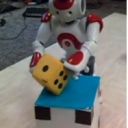

In [3]:
Image(filename='NAORelease.jpg')

### 1. Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg". As a feature vector use RGB-representation of each pixel from the image. Refer slide no-24 from MOGandEM.pdf (4th lecture)[30 points]

1. Initialization: pick K arbitrary centroids (cluster means)
2. Assign each sample to the closest centroid.
3. Adjust the centroids to be the means of the samples assigned to them.
4. Go to step 2 (until no change)

Kmeans clustering


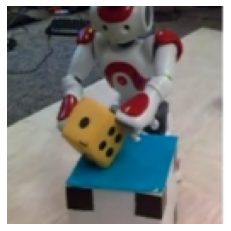

Image compressed using our algorithm: 16 clusters, 10 iterations


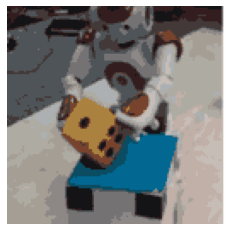

Image compressed using our algorithm: 16 clusters, 30 iterations


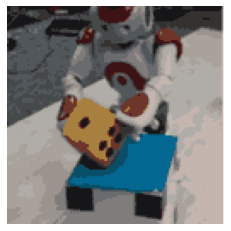

Image compressed using our algorithm: 16 clusters, 60 iterations


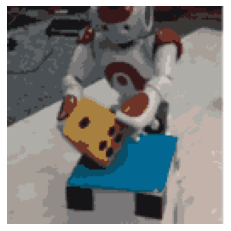

Image compressed using our algorithm: 2 clusters, 10 iterations


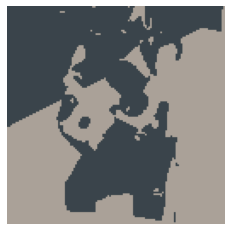

Image compressed using our algorithm: 10 clusters, 10 iterations


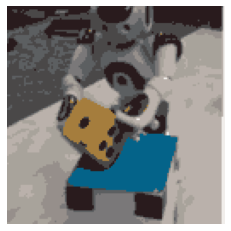

Image compressed using our algorithm: 20 clusters, 10 iterations


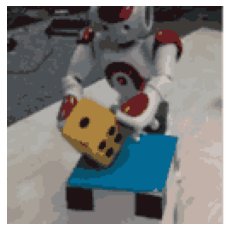

In [579]:
#Code here

## CLUSTERS = number of colors that we choose to preserve 
## CENTROIDS = array of means of the clusters

def initialise_centroid(image: np.ndarray, k: int) -> np.ndarray:
    '''
    Function to initialise the centroids.
    
    Returns
    -------
    centroids : np.ndarray
                Randomly chosen 'k' centroids.
    '''
    
    # Initialise the centroid array
    centroids = np.array([])
    
    # Create a copy of the image and randomly 
    # assign 'k' points as the centroids
    image_copy = image.copy()
    np.random.shuffle(image_copy)
    centroids = image_copy[:k]
    return centroids

def sampleClosestCentroid(image, centroids):
    '''
    Function to assign each data sample to the closest centroid. Finds
    the euclidean distances between each data point and each centroid.
    
    Returns
    -------
    nearest_centroid : List
                       A list containing the indices of the centroids
                       closest to each pixel/point in the image.
            
    '''
    nearest_centroids = []
    nearest_centroids_dict = {}
    
    # Calculate euclidean distance between each data point
    # and each centroid. Append the index of the closest 
    # centroid for each point into an array
    for i, point in enumerate(image):
        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(point-centroid))
        nearest_centroids.append(np.argmin(distances, axis = 0))
        nearest_centroids_dict[i] = np.argmin(distances, axis = 0)
    return nearest_centroids, nearest_centroids_dict

def adjustCentroidsMean(image, centroids, nearest_centroids_dict):
    '''
    Function that adjusts the centroids according to the mean of
    the assigned centroids.
    '''
    adjusted_centroids = []        
    for i, centroid in enumerate(centroids):
        points = []
        for index, value in nearest_centroids_dict.items():
            if i == value:
                points.append(image[index])
        adjusted_centroids.append(np.array(points).mean(axis=0))
    return adjusted_centroids

def kMeansClustering(image, k, iterations):
    '''
    Function that iteratively adjusts the centroids.
    '''
    centroids = initialise_centroid(image, k)
    for i in range(iterations):
        nearest_centroids = sampleClosestCentroid(image, centroids)[0]        
        centroids = adjustCentroidsMean(image, centroids, 
                                        sampleClosestCentroid(image, centroids)[1])
    return np.asarray(centroids), nearest_centroids

def compressImage(image, k=16, iterations=100):
    '''
    Function to compress the image
    '''
    centroids, nearest_centroids = kMeansClustering(image, k, iterations)
    compressed_image = centroids[nearest_centroids]   
    compressed_image = (compressed_image).reshape(128, 128, 3)
    return compressed_image

def load_image(path: str) -> np.ndarray:
    '''
    Function to load image from specified path.
    
    Returns
    -------
    image : np.ndarray
            Input image scaled by a factor of 255.0. 
    '''
    image = PIL.Image.open(path)
    image = np.asarray(image)
    image = image / 255.0
    # image = image.reshape(-1, 3)
    return image
    
def display_image(image):
    '''
    Function to display the image
    '''
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
if __name__ == '__main__': 
    
    print("Kmeans clustering")
    # Assign parameters
    
    # Read image
    image = load_image('NAORelease.jpg')    
    display_image(image)
    image = image.reshape(-1, 3)
    
    # Compress and display
    compressed_image = compressImage(image, 16, 10)
    print("Image compressed using our algorithm: 16 clusters, 10 iterations")
    display_image(compressed_image)
    
    # Compress and display
    compressed_image = compressImage(image, 16, 30)
    print("Image compressed using our algorithm: 16 clusters, 30 iterations")
    display_image(compressed_image)
    
    # Compress and display
    compressed_image = compressImage(image, 16, 60)
    print("Image compressed using our algorithm: 16 clusters, 60 iterations")
    display_image(compressed_image)
    
    # Compress and display
    compressed_image = compressImage(image, 2, 10)
    print("Image compressed using our algorithm: 2 clusters, 10 iterations")
    display_image(compressed_image)
    
    # Compress and display
    compressed_image = compressImage(image, 10, 10)
    print("Image compressed using our algorithm: 10 clusters, 10 iterations")
    display_image(compressed_image)
    
    # Compress and display
    compressed_image = compressImage(image, 20, 10)
    print("Image compressed using our algorithm: 20 clusters, 10 iterations")
    display_image(compressed_image)

### 2. What are the parameters you played around what is your inference? Hint:- See which are the changeable ones- Hyperparameters[10 points]

1. Number of iterations
2. Number of clusters
3. Random state

### 3. Compare your implementation with the existing k-mean algorithm given in sklearn. e.g running time[10 points]

Image compressed using our algorithm


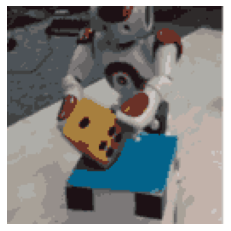

Time taken to compress image using our algorithm: 219.765 seconds


In [577]:
# Start timer
start_time = time.time()

compressed_image = compressImage(image, 16, 100)
print("Image compressed using our algorithm")
display_image(compressed_image)

# Print time taken to run algorithm 
print('Time taken to compress image using our algorithm:', np.round(time.time() - start_time, 3), 'seconds')

Image compressed using sklearn


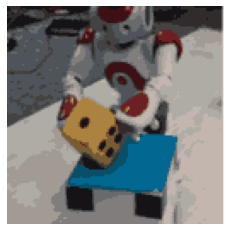

Time taken to compress image using sklearn 2.105 seconds


In [576]:
import matplotlib.pyplot as plt

# Start timer
start_time = time.time()

# Load Image
image = load_image('NAORelease.jpg')
image = ((image).reshape(-1, 3))
plt.imshow(image)

# Compute k-means using module from sklearn
kmeans = KMeans(n_clusters=16, random_state=0).fit(image)
compressed_image_sklearn = kmeans.cluster_centers_[kmeans.predict(image)]

print("Image compressed using sklearn")
compressed_image_sklearn = (compressed_image_sklearn).reshape(128, 128, 3)
display_image(compressed_image_sklearn)

# Print time taken to run algorithm 
print('Time taken to compress image using sklearn:', np.round(time.time() - start_time, 3), 'seconds')

Inference:
The time taken for compressing image with sklearn is much faster

# Task 2: Mixture of Gaussian, EM-Algorithm[50 points]

### Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets:



- Follow the technical advises given in the lecture, namely run first k-means for the first 10-100 iterations (if required for the built in function its takes care by itself)
- Check if you need to add regularisation 
- Plot 
    1. Initial distribution - All the points should have same color.
    2. Soft assignment -  Assign the data points to the particular cluster only if their probability is above 0.9 others are to be considered as outliers. So give different color for all the outliers and clusters as shown in the second plot of the image (You should explore the way to do this).
    3. Hard assignment -  Each cluster should have different colors here you won't have outliers since the neighbouring datapoints are assigned to some clusters.
   
- All the clusters should have ellipsoids of three standard deviation. Kindly replicate the scene given in the image.

**Use sklearn**

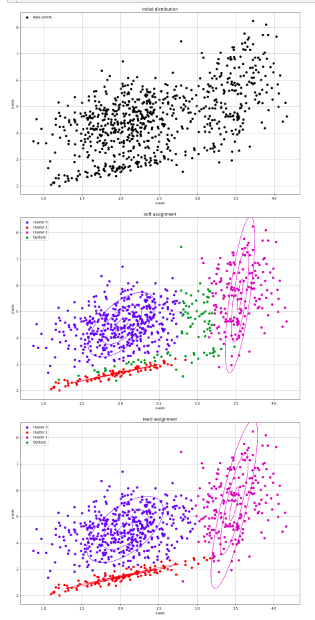

**Image is given only for dataset1, dataset2 the procedure is same so you should get the right plot.

## Dataset 1[35 points]

In [506]:
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data = data[1:, :]
    

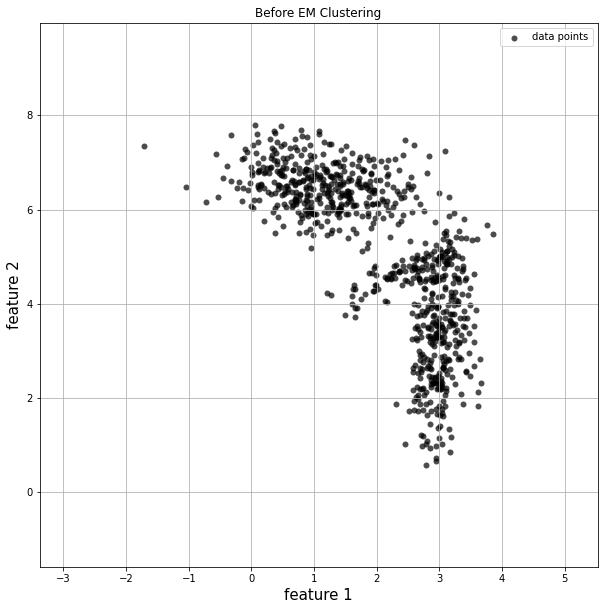

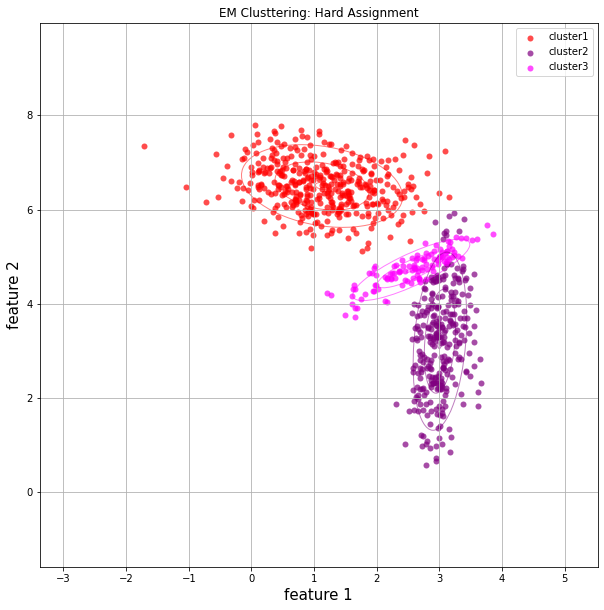

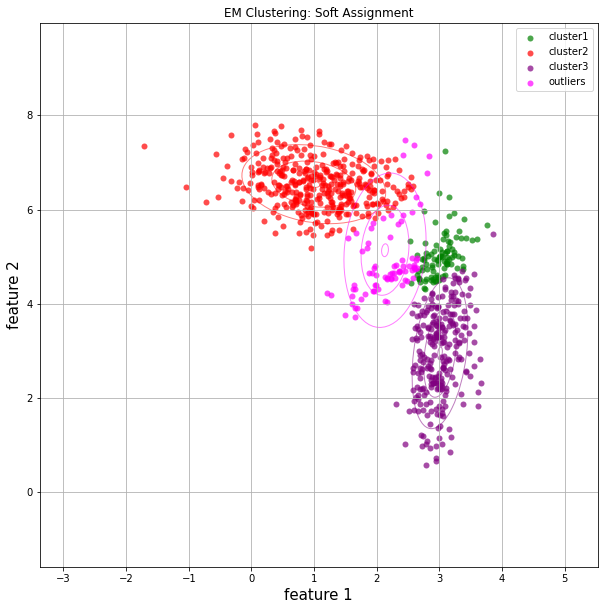

In [512]:
# References: 
# https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py

# Gaussian Mixture, Bayesian Gaussian Mixture with a Dirichlet process prior

import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])



def algorithmEM(data, assignment='hard', clusters = 3):
    '''
    Function to cluster data using EM plot the clusters
    
    data:       data points that need to be clustered
    assignment: 'hard' or 'soft'
    clusters:   number of clusters
    '''
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.margins(0.3, 0.3)
    ax.grid()
    
    
    
    # Initialise the Gaussian Mixutre model 
    # and fit it to the given data
    model = GaussianMixture(n_components=clusters,init_params='kmeans',)
    model.fit(data)
    
    
    if assignment == 'none':
        
        ax.scatter(data[:,0], data[:,1], 
                   c = 'black', alpha=0.7, linewidths=0.01)
        ax.legend(['data points', 'cluster2', 'cluster3', 'outliers'])
        plt.title('Before EM Clustering')
        plt.xlabel('feature 1', fontsize=15)
        plt.ylabel('feature 2', fontsize=15)
        plt.show()
        
    # Check if the assignment is hard
    elif assignment == 'hard':
        
        covariances = model.covariances_
        means = model.means_
        
        # Predict the cluster for each data point
        labels = model.predict(data)
        
        # Create a data frame for storing the predictions
        frame = pd.DataFrame(data)
        frame['labels'] = labels
        frame.columns = ['feature1', 'feature2', 'labels']
        
        # Plot the predicted clusters
        colors = ['red', 'purple', 'magenta']
        for k in range(clusters):
            
            v, w = linalg.eigh(covariances[k])
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            u = w[0] / linalg.norm(w[0])
            
            # Scatter plot
            data = frame[frame['labels']==k]
            ax.scatter(data['feature1'], data['feature2'], 
                       c = colors[k], alpha=0.7, linewidths=0.01)
            
            # Plot an ellipse to show the Gaussian component
            # nstd = 1
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(means[k], 0.1*v[0], 0.1*v[1], 180. + angle, color=colors[k])
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ell.set_facecolor('none')
            ax.add_artist(ell)
            
            # nstd = 2
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(means[k], 0.7*v[0], 0.7*v[1], 180. + angle, color=colors[k])
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ell.set_facecolor('none')
            ax.add_artist(ell)
            
            # nstd = 3
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(means[k], 1.2*v[0], 1.2*v[1], 180. + angle, color=colors[k])
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ell.set_facecolor('none')
            ax.add_artist(ell)
        
        ax.legend(['cluster1', 'cluster2', 'cluster3'])
        plt.title('EM Clusttering: Hard Assignment')
        plt.xlabel('feature 1', fontsize=15)
        plt.ylabel('feature 2', fontsize=15)
        plt.show()
    
    # Check if the assignment is soft
    if assignment == 'soft':
        
        # Find the outliers by thresholding probability at 0.9
        outliers = []
        # Check the cluster probablities of each data point
        # If there are data points which have cluster probablity 
        # which is less than 0.9 then they are outliers
        for index, proba in enumerate(model.predict_proba(data)):
            if (len(np.where(proba < 0.9)[0])) == clusters:
                outliers.append(index)
                
        # Predict the cluster for each data point 
        # Assign a separate label/cluster for the outliers
        labels = model.predict(data)
        for outlier in outliers:
            labels[outlier] = clusters
            
        # Create a data frame for storing the predictions    
        frame = pd.DataFrame(data)
        frame['labels'] = labels
        frame.columns = ['feature1', 'feature2', 'labels']
        
        # Plot the predict clusters
        colors = ['red', 'purple', 'magenta', 'green']
                
        # Plot outliers
        data = frame[frame['labels']==3]
        ax.scatter(data['feature1'], data['feature2'], 
                   c = colors[3], alpha=0.7, linewidths=0.01)
            
        # Fit data without outliers
        # Plot data and ellipses without outliers
        data_new = frame.loc[frame['labels'] != 3]  
        
        data_to_fit = np.array([(data_new['feature1']), (data_new['feature2'])]).T
        model.fit(data_to_fit)
        covariances = model.covariances_
        means = model.means_
        
        labels = model.predict(data_to_fit)
        
        # Create a data frame for storing the predictions
        frame = pd.DataFrame(data_to_fit)
        frame['labels'] = labels
        frame.columns = ['feature1', 'feature2', 'labels']
        
        # Plot the predicted clusters
        colors = ['red', 'purple', 'magenta']
        
        for k in range(clusters):
            v, w = linalg.eigh(covariances[k])
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            u = w[0] / linalg.norm(w[0])
            
            # Scatter plot
            data = frame[frame['labels']==k]
            ax.scatter(data['feature1'], data['feature2'], 
                       c = colors[k], alpha=0.7, linewidths=0.01)
            
            # Plot an ellipse to show the Gaussian component
            # nstd = 1
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(means[k], 0.1*v[0], 0.1*v[1], 
                                      180. + angle, color=colors[k])
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ell.set_facecolor('none')
            ax.add_artist(ell)
            
            # nstd = 2
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(means[k], 0.7*v[0], 0.7*v[1], 
                                      180. + angle, color=colors[k])
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ell.set_facecolor('none')
            ax.add_artist(ell)
            
            # nstd = 3
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(means[k], 1.2*v[0], 1.2*v[1], 
                                      180. + angle, color=colors[k])
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ell.set_facecolor('none')
            ax.add_artist(ell)
            
            
        ax.legend(['cluster1', 'cluster2', 'cluster3', 'outliers'])
        plt.title('EM Clustering: Soft Assignment')
        plt.xlabel('feature 1', fontsize=15)
        plt.ylabel('feature 2', fontsize=15)
        plt.show()

    

if __name__ == '__main__':
    algorithmEM(data, 'none')
    algorithmEM(data, 'hard')
    algorithmEM(data, 'soft')
    
    

#### Explain the concept behind your ellipsoid plotting, like how you plotted it [5 points]

## Dataset 2[10 points]

In [513]:
np.random.seed(150)
means = np.array([[1.1, 6.5],
                  [2.5, 4.7],
                  [3.0, 3.3]])
covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
               np.array([[0.35, 0.22], [0.22, 0.20]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [4, 1, 3]
factor = 100

data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
          np.random.multivariate_normal(means[i], covariances[i],
                                                size=factor * amplitudes[i])])
data = data[1:, :]

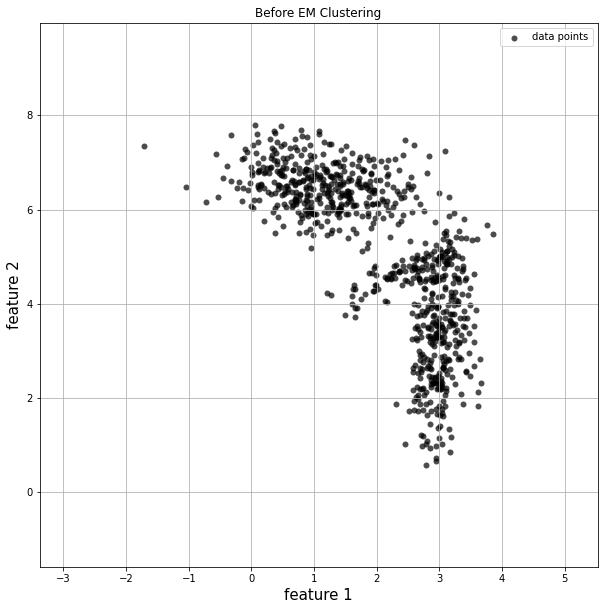

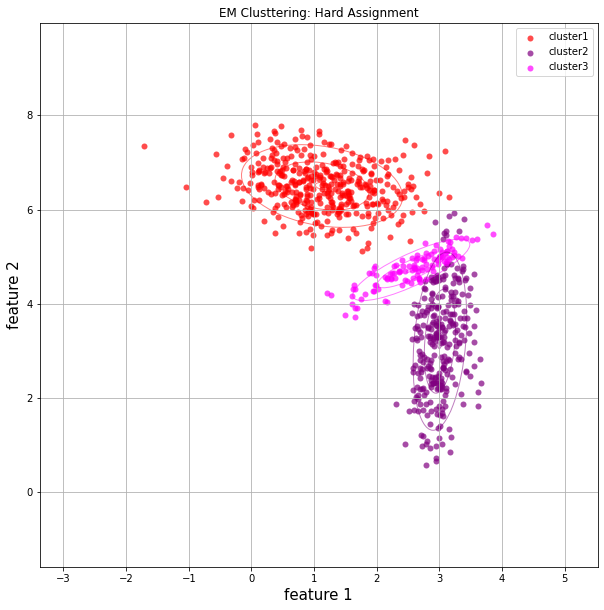

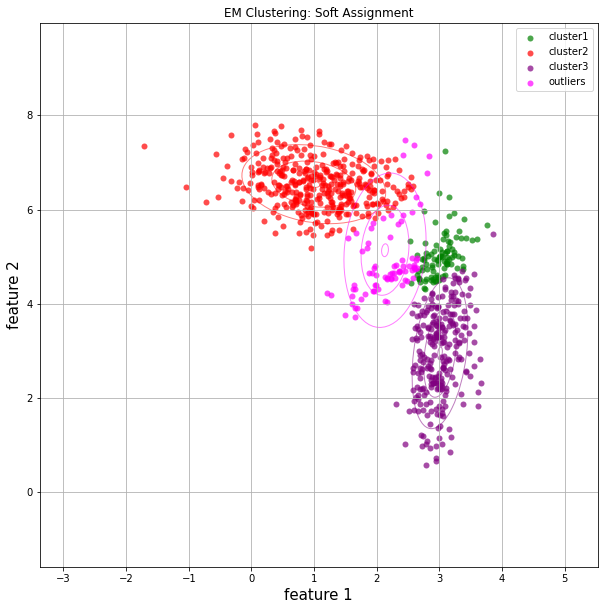

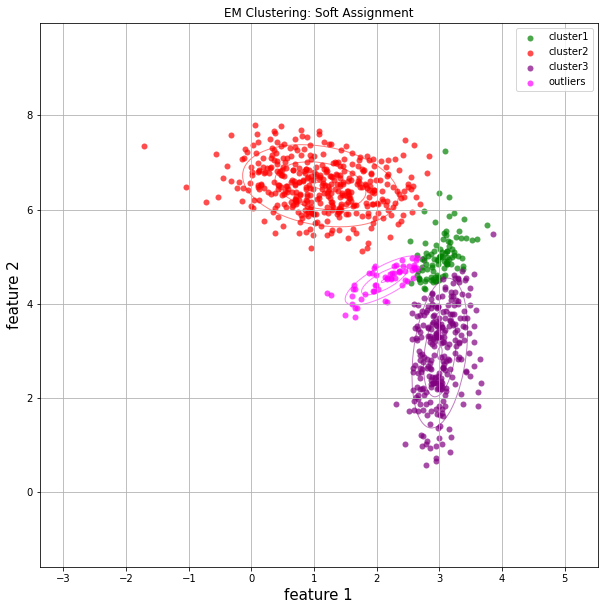

In [514]:
#### Call the function EM algorithm for dataset2

if __name__ == '__main__':
    algorithmEM(data, 'none')
    algorithmEM(data, 'hard')
    algorithmEM(data, 'soft')
    algorithmEM(data, 'soft')